<a href="https://colab.research.google.com/github/prashant-027/YBI_Handson_Project/blob/main/Bank_Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Model**

# **Import Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

In [4]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.duplicated('CustomerId').sum()

0

In [8]:
df = df.set_index('CustomerId')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# **Encoding**

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df.replace({'Geography' : {'France' : 2, 'Germany' : 1, 'Spain' : 0}}, inplace = True)

In [12]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
df.replace({'Gender' : {'Male' : 0, 'Female' : 1,}}, inplace = True)

In [14]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [15]:
df.replace({'Num Of Products' : {1 : 0, 2 : 1, 3 : 1, 4 : 1}}, inplace = True)

In [16]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [17]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [18]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [19]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

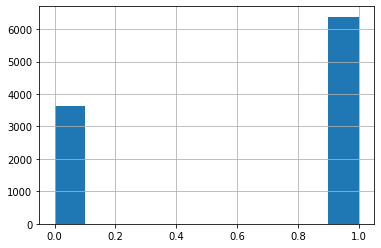

In [20]:
df['Zero Balance'].hist()

In [21]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# **Define Label and Features**

In [22]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [23]:
X = df.drop(['Surname', 'Churn'], axis = 1)

In [24]:
Y = df['Churn']

In [25]:
X.shape, Y.shape

((10000, 11), (10000,))

# **Handling Imbalance Data**

In [27]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

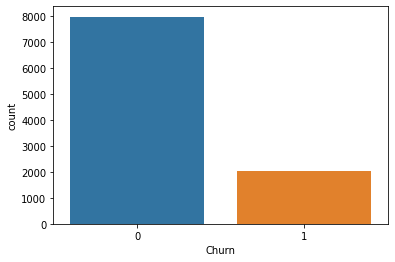

In [28]:
sns.countplot(x = 'Churn', data = df)

In [29]:
X.shape , Y.shape

((10000, 11), (10000,))

# **Random Under Sampling**

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
rus = RandomUnderSampler(random_state = 2529)

In [32]:
X_rus, Y_rus = rus.fit_resample(X, Y)

In [33]:
X_rus.shape, Y_rus.shape, X.shape, Y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [34]:
Y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [35]:
Y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [37]:
Y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

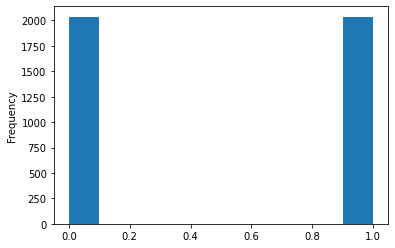

In [38]:
Y_rus.plot(kind = 'hist')

# **Random Over Sampling**

In [40]:
from imblearn.over_sampling import RandomOverSampler

In [44]:
ros = RandomOverSampler(random_state = 2529)

In [45]:
X_ros, Y_ros = ros.fit_resample(X, Y)

In [46]:
X_ros.shape, Y_ros.shape, X.shape, Y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [48]:
Y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [49]:
Y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

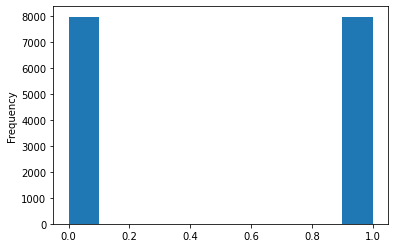

In [50]:
Y_ros.plot(kind = 'hist')

# **Train Test Split**

In [51]:
from sklearn.model_selection import train_test_split

**Split Original Data**

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2529)

**Split Random Under Sample Data**

In [53]:
X_train_rus, X_test_rus, Y_train_rus, Y_test_rus = train_test_split(X_rus, Y_rus, test_size = 0.3, random_state = 2529)

**Split Random Over Sample Data**

In [54]:
X_train_ros, X_test_ros, Y_train_ros, Y_test_ros = train_test_split(X_ros, Y_ros, test_size = 0.3, random_state = 2529)

# **Standardize Features**

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc = StandardScaler()

**Standardize Original Data**

In [57]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [58]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Standardize Random Over Sample Data**

In [59]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [60]:
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Standardize Random Over Sample Data**

In [61]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [62]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# **Support Vector Machine Calssifier**

In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC()

In [67]:
svc.fit(X_train, Y_train)

SVC()

In [68]:
Y_pred = svc.predict(X_test)

# **Model Accuracy**

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
confusion_matrix(Y_test, Y_pred)

array([[2381,   33],
       [ 436,  150]])

In [71]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



# **Hyperparameter Tuning**

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {'C' : [0.1,1,10],
              'gamma' : [1,0.1,0.01],
              'kernel' : ['rbf'],
              'class_weight' : ['balanced']}

In [74]:
grid = GridSearchCV(SVC(),param_grid, refit = True, verbose = 2, cv = 2)

In [75]:
grid.fit(X_train, Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [76]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [77]:
grid_predictions = grid.predict(X_test)

In [78]:
confusion_matrix(Y_test, grid_predictions)

array([[2159,  255],
       [ 343,  243]])

In [79]:
print(classification_report(Y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



# **Model with Random Under Sampling**

In [80]:
svc_rus = SVC()

In [81]:
svc_rus.fit(X_train_rus, Y_train_rus)

SVC()

In [83]:
Y_pred_rus = svc_rus.predict(X_test_rus)

# **Model Accuracy**

In [84]:
confusion_matrix(Y_test_rus,Y_pred_rus)

array([[470, 157],
       [174, 422]])

In [85]:
print(classification_report(Y_test_rus, Y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



# **Hyperparameter Tunning**

In [86]:
param_grid = {'C' : [0.1,1,10],
              'gamma' : [1,0.1,0.01],
              'kernel' : ['rbf'],
              'class_weight' : ['balanced']}

In [88]:
grid_rus = GridSearchCV(SVC(),param_grid, refit = True, verbose = 2, cv = 2)

In [89]:
grid_rus.fit(X_train_rus, Y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [90]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [95]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [96]:
confusion_matrix(Y_test_rus,grid_predictions_rus)

array([[476, 151],
       [172, 424]])

In [97]:
print(classification_report(Y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



# **Model with Random Over Sampling**

In [98]:
svc_ros = SVC()

In [99]:
svc_ros.fit(X_train_ros, Y_train_ros)

SVC()

In [100]:
Y_pred_ros = svc_ros.predict(X_test_ros)

# **Model Accuracy**

In [102]:
confusion_matrix(Y_test_ros, Y_pred_ros)

array([[1823,  556],
       [ 626, 1773]])

In [104]:
print(classification_report(Y_test_ros, Y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



# **Hyperparameter Tunning**

In [105]:
param_grid = {'C' : [0.1,1,10],
              'gamma' : [1,0.1,0.01],
              'kernel' : ['rbf'],
              'class_weight' : ['balanced']}

In [106]:
grid_ros = GridSearchCV(SVC(),param_grid, refit = True, verbose = 2, cv = 2)

In [107]:
grid_ros.fit(X_train_ros,Y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [108]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [109]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [112]:
print(classification_report(Y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778

